## ***1. Apply PCA and LDA technique on IRIS Dataset***

## ***A. PCA***

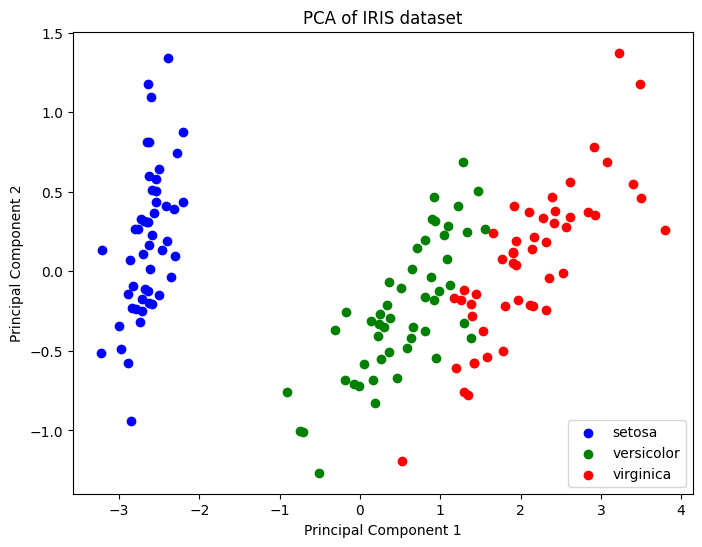

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Define color map
colors = ['blue', 'green', 'red']

# Plot the transformed data with colors
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=colors[i], label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of IRIS dataset')
plt.legend()
plt.show()


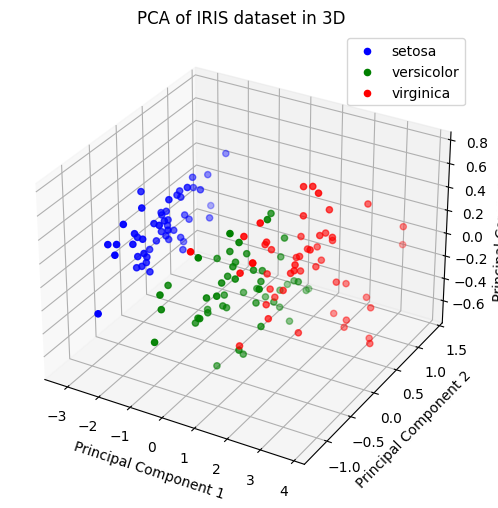

In [3]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Define color map
colors = ['blue', 'green', 'red']

# Plot the transformed data in 3D with colors
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for i, target_name in enumerate(iris.target_names):
    ax.scatter(X_pca[y == i, 0], X_pca[y == i, 1], X_pca[y == i, 2], color=colors[i], label=target_name)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of IRIS dataset in 3D')
plt.legend()
plt.show()


## ***B. LDA***

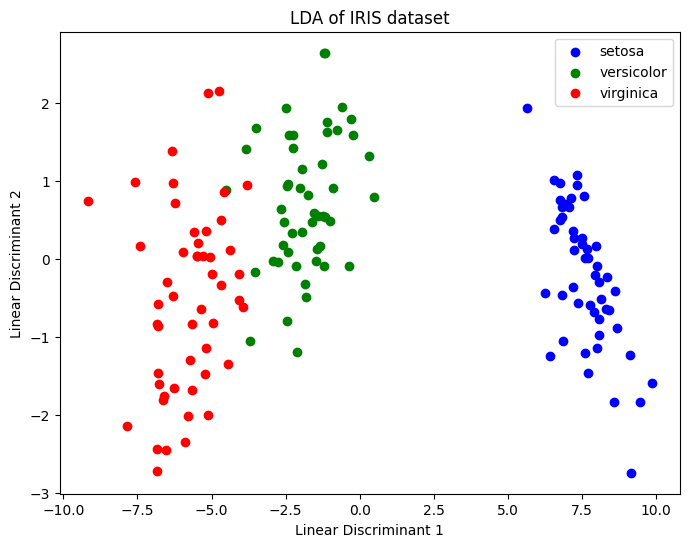

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load the IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# Define color map
colors = ['blue', 'green', 'red']

# Plot the transformed data with colors
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=colors[i], label=target_name)
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA of IRIS dataset')
plt.legend()
plt.show()



## ***2. Explain the difference between two approaches.***

| Criteria       | PCA                            | LDA                            |
|----------------|--------------------------------|--------------------------------|
| Objective      | Dimensionality reduction       | Feature extraction/classification|
| Goal           | Maximize variance              | Maximize class separability    |
| Input          | Unlabeled data                 | Labeled data                   |
| Method         | Linear transformation          | Linear discriminant analysis  |
| Dimensionality | Reduces dimensions             | May reduce or retain dimensions|
| Supervision    | Unsupervised                   | Supervised                     |
| Components     | Principal components            | Discriminant components        |
| Use Case       | Preprocessing for clustering, visualization | Feature extraction for classification |
| Example        | Face recognition, gene expression analysis | Character recognition, medical diagnosis |


## ***3. Use colab examples given in the classroom group for applying PCA and LDA to different datasets, and share an EXPLANATION about how do you interpret the results.***

In [4]:
# Introducing Principal Component Analysis

# Standard imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<ipython-input-4-0d4d63d9371d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, '2D Dataset')

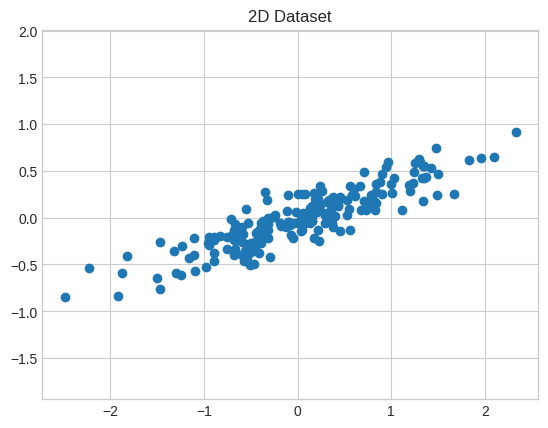

In [5]:
# Generate 2D dataset
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.title('2D Dataset')

In [6]:
# PCA computation
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Text(0.5, 1.0, 'Principal Components')

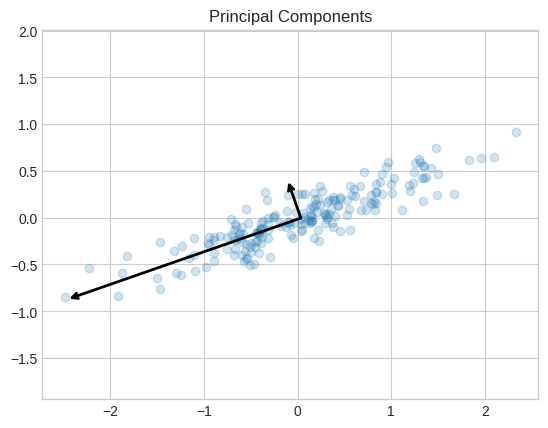

In [7]:
# Visualize principal axes
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.title('Principal Components')

In [8]:
# PCA for dimensionality reduction
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Text(0.5, 1.0, 'Dimensionality Reduction with PCA')

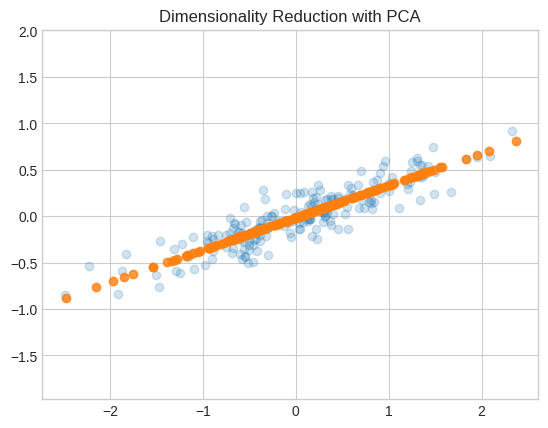

In [9]:
# Visualize dimensionality reduction
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')
plt.title('Dimensionality Reduction with PCA')

(1797, 64)
(1797, 2)


<ipython-input-10-77f25dc0100f>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('rainbow', 10))


Text(0.5, 1.0, 'Handwritten Digits Visualization')

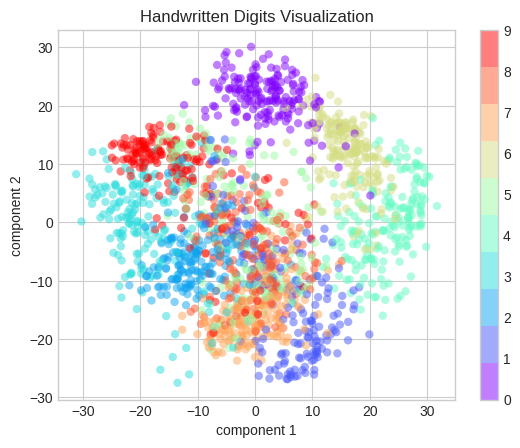

In [10]:
# PCA for visualization: Handwritten digits
from sklearn.datasets import load_digits
digits = load_digits()

pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.title('Handwritten Digits Visualization')

Text(0.5, 1.0, 'Choosing Number of Components')

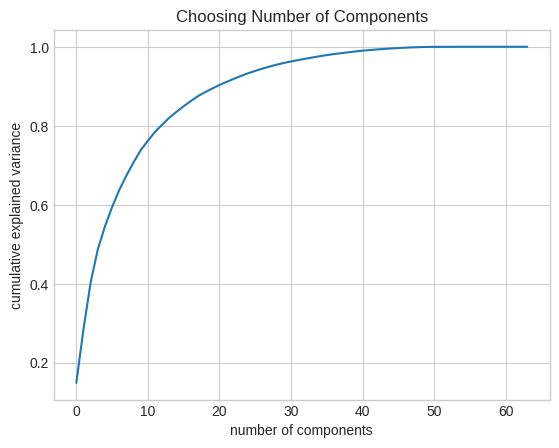

In [11]:
# Choosing the number of components
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Choosing Number of Components')

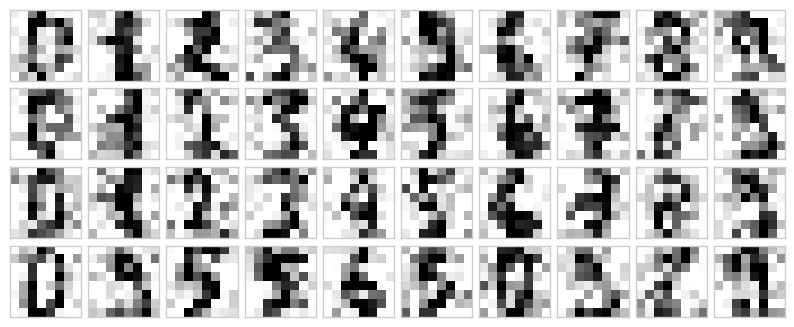

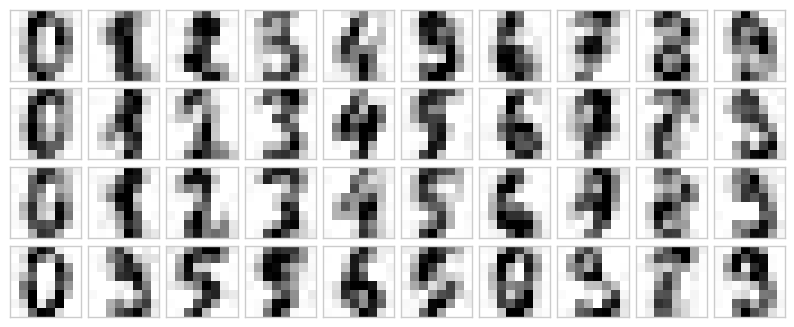

In [12]:
# PCA as noise filtering
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

rng = np.random.default_rng(42)
noisy = rng.normal(digits.data, 4)
plot_digits(noisy)

pca = PCA(0.50).fit(noisy)
pca.n_components_

components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


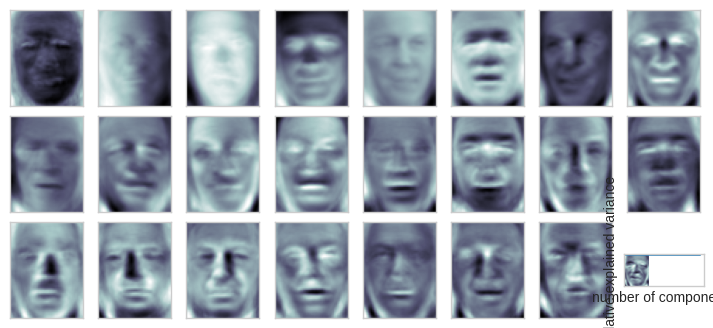

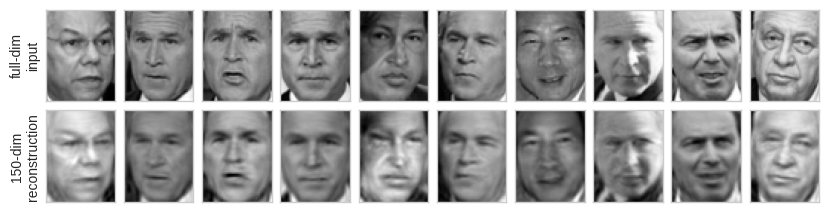

In [13]:
# Example: Eigenfaces
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

pca = PCA(150, svd_solver='randomized', random_state=42)
pca.fit(faces.data)

fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

pca = pca.fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')

plt.show()

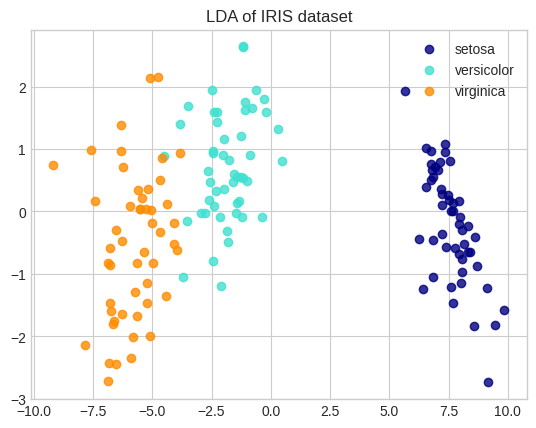

In [14]:
# Import necessary libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset as an example
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

# Create an LDA model
lda = LinearDiscriminantAnalysis(n_components=2)  # You can specify the number of components for dimensionality reduction

# Fit the model to the data
X_lda = lda.fit(X, y).transform(X)

# Visualize the results
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.show()
